# Lecture 19: Text Mining

### What is Text Mining?

Text Mining is the process of deriving meaningful information from natural language text.

Run *pip install scikit-learn==1.1.3* in terminal.

### What is NLP?

Natural Language Processing(NLP) is a part of computer science and artificial intelligence which deals with human languages.

NLP is a component of text mining that performs a special kind of linguistic analysis that essentially **helps a machine “read” text**.

To decipher the ambiguities in human language, the following methods are often used:

1. automatic summarization
2. part-of-speech tagging
3. chunking

We will go over them one by one

In [ ]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus 


# You have to install nltk (natural language toolkit) pakeage first if you don't already have it installed. Run *pip install nltk* in terminal.

In [ ]:
# To install the missing module, only need to install once
nltk.download() 

## Automatic Summarization

### Tokenization

Tokenization is the first step in NLP. It is the process of breaking strings into tokens which in turn are small structures or units.

Tokenization involves three steps:
1. breaking a complex sentence into words
2. understanding the importance of each word with respect to the sentence
3. produce structural description on an input sentence.

In [ ]:
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America" 

from nltk.tokenize import word_tokenize

token = word_tokenize(text) # Passing the string text into word tokenize for breaking the sentences

token

From the above output, we can see the text split into tokens. Words, comma, punctuations are called tokens.

### Finding the frequency distinct in the tokens

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

‘the’ is found 3 times in the text, ‘Brazil’ is found 2 times in the text, etc.

In [ ]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

### Stemming
Stemming usually refers to normalizing words into its base form or root form.

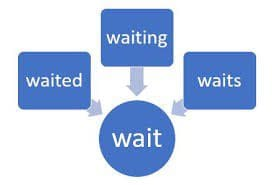

In [ ]:
# Importing Porterstemmer from nltk library
# Checking for the word 'waitng' 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")

In [ ]:
# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

Lancaster is another stemmer that is more aggressive than Porter stemmer

In [ ]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "given", "gave"]
for word in stm :
 print(word+ ":" +lst.stem(word))

### Lemmatization

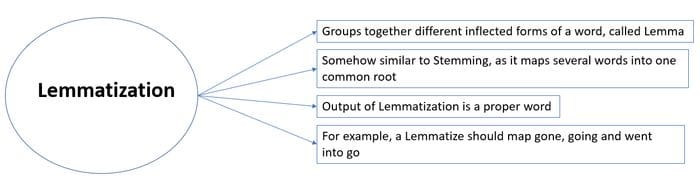

In simpler terms, it is the process of converting a word to its base form. 

The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

### Stop Words

“Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all”. These words do not provide any meaning and are usually removed from texts. We can remove these stop words using nltk library

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America"
text1 = word_tokenize(text.lower())
print(text1)

stopwords = [x for x in text1 if x not in a]
print(stopwords)

## Part of speech tagging (POS)

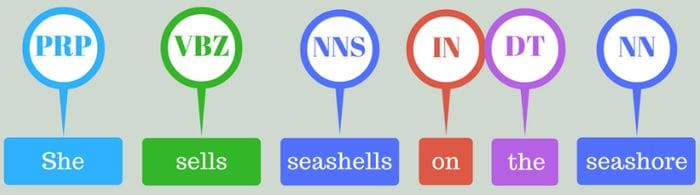

Part-of-speech tagging is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection) based on its definition and its context. 

There are many tools available for POS taggers and some of the widely used taggers are NLTK, Spacy, TextBlob, Standford CoreNLP, etc.

In [ ]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"
#Tokenize the text
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))

### Named entity recognition

It is the process of detecting the named entities such as the person name, the location name, the company name, the quantities and the monetary value.

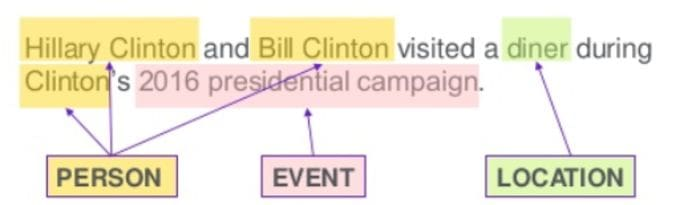

In [ ]:
text = "Google's CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
#text = "Hillary Clinton and Bill Clinton visited a diner during Clinton's 2016 presidential campaign"

from nltk import ne_chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk

# The pakage svgling may be missing. Install with "pip install svgling".

## Chunking
 
Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining, chunking means a grouping of words or tokens into chunks.

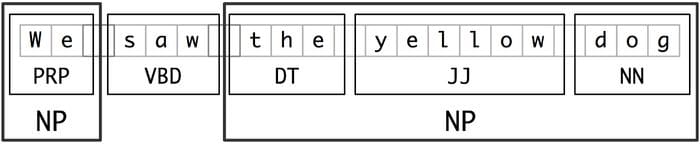

In [ ]:
text = "We saw the yellow dog"
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}" 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)